<center>


<h1>Proyecto Propedeutico de Programación:

El indice de marginalización de México </h1>


<p><img src="https://avatars.githubusercontent.com/u/60750757?s=280&v=4" width="200">
</p>

<h2> Autor: Ivan Dario Davila Peralta</h2>

</center>

En este notebook se vera cada paso de como se analizo la base de datos de CONAPO usando pandas.

Se descargan todas las librerias necesarias para este trabajo. Entre ellas pandas numpy y matplotlib.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se descargar y Leer el archivo de Base de Datos por Municipio 2020 del índice de marginación desde la página de descargas del gobierno federal mexicano en un dataframe. Los datos se encuentran en la pestaña "IMM 2020.

In [4]:
link = "http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls"

data_mncpio = pd.read_excel(link, header=5)
data_mncpio.head(5)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nacional,NaN,NaN,NaN,126014024.0,4.752150,29.713764,1.469115,0.660563,3.667182,3.807968,19.732297,26.999922,66.884043,—,—,—,—
2,01,Aguascalientes,1001.0,Aguascalientes,948990.0,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508,2435
3,01,Aguascalientes,1002.0,Asientos,51536.0,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433,1816
4,01,Aguascalientes,1003.0,Calvillo,58250.0,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453,1932


En este caso, la primeras fila son datos vacios que fueron utilizados para darle formato al archivo excel; y al mismo tiempo, la segunda fila es utilizada para dar la sumatoria nacional de estos. Se descartan estas dos columnas.

In [5]:
# descartamos las dos primeras filas
data_mncpio = data_mncpio.drop([0,1, 2471, 2472])

In [6]:
# Descripcion del data frame
data_mncpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 2 to 2470
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CVE_ENT      2469 non-null   object 
 1   NOM_ENT      2469 non-null   object 
 2   CVE_MUN      2469 non-null   float64
 3   NOM_MUN      2469 non-null   object 
 4   POB_TOT      2469 non-null   float64
 5   ANALF        2469 non-null   float64
 6   SBASC        2469 non-null   float64
 7   OVSDE        2469 non-null   float64
 8   OVSEE        2469 non-null   float64
 9   OVSAE        2469 non-null   float64
 10  OVPT         2469 non-null   float64
 11  VHAC         2469 non-null   float64
 12  PL.5000      2469 non-null   float64
 13  PO2SM        2469 non-null   float64
 14  IM_2020      2469 non-null   object 
 15  GM_2020      2469 non-null   object 
 16  IMN_2020     2469 non-null   object 
 17  Unnamed: 17  2469 non-null   object 
dtypes: float64(11), object(7)
memory usage: 366.5+ K

In [7]:
#Descripcion de datos numericos
data_mncpio.describe(include="float64")

,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM
count,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854
std,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444
min,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113
25%,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600
50%,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266
75%,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112
max,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000


In [8]:
#descripcion de datos categoricos
data_mncpio.describe(include="object")

,CVE_ENT,NOM_ENT,NOM_MUN,IM_2020,GM_2020,IMN_2020,Unnamed: 17
count,2469,2469,2469,2469.000000,2469,2469.000000,2469
unique,32,32,2328,2469.000000,5,2469.000000,2469
top,20,Oaxaca,Benito Juárez,60.318795,Muy bajo,0.944508,2435
freq,570,570,7,1.000000,655,1.000000,1


In [9]:
#Contamos cuantas variables son numericas y cuales son categoricas.
numeric_cols = data_mncpio.select_dtypes(include=['float64', 'int']).columns
cat_cols = data_mncpio.select_dtypes(include=['object', 'category']).columns
print(f"Datos numericos: {len(numeric_cols)}")
print(f"Datos cateoricos: {len(cat_cols)}")

Datos numericos: 11
Datos cateoricos: 7


In [10]:
#Al parecer la ultima categoria del lugar que ocupa a nivel nacional
#Renombraremos esta variable por IND_NACI0NAL
data_mncpio.rename(columns = {'Unnamed: 17':'IND_NACI0NAL'}, inplace = True)
data_mncpio.columns

Index(['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN', 'POB_TOT', 'ANALF', 'SBASC',
       'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM',
       'IM_2020', 'GM_2020', 'IMN_2020', 'IND_NACI0NAL'],
      dtype='object')

In [11]:
#imprimimos los 5 municipios mas marginados a nivel nacional.
data_mncpio.sort_values("IND_NACI0NAL").head(5)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IND_NACI0NAL
215,08,Chihuahua,8008.0,Batopilas de Manuel Gómez Morín,11270.0,45.522928,84.480764,57.185439,53.065463,23.693002,56.070461,47.251167,100.0,93.463561,21.406635,Muy alto,0.335198,1
304,10,Durango,10014.0,Mezquital,48583.0,22.869092,57.154172,38.949868,42.404533,50.631232,50.820128,55.670326,100.0,82.785739,28.222995,Muy alto,0.441933,2
948,18,Nayarit,18009.0,Del Nayar,47550.0,27.268016,66.476111,64.450424,32.724169,31.887197,47.535342,54.015839,100.0,86.138199,28.670142,Muy alto,0.448935,3
601,14,Jalisco,14061.0,Mezquitic,22083.0,24.746515,63.047846,60.415671,30.726577,31.012900,46.076978,37.489361,100.0,79.963235,31.305668,Muy alto,0.490203,4
453,12,Guerrero,12078.0,Cochoapa el Grande,21241.0,53.071253,82.818533,61.039822,9.957858,18.310526,43.647900,61.519905,100.0,91.121495,32.205441,Muy alto,0.504292,5


In [12]:
#de igual manera imprimimos los municipios menos marginados.
data_mncpio.sort_values("IND_NACI0NAL").tail(5)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020,IND_NACI0NAL
965,19,Nuevo León,19006.0,Apodaca,656464.0,0.736270,11.873313,0.002763,0.014276,0.051578,0.334830,10.754394,2.701748,40.892191,61.315874,Muy bajo,0.960121,2465
288,09,Ciudad de México,9015.0,Cuauhtémoc,545884.0,0.952548,13.528740,0.054147,0.029113,0.108849,0.122046,9.417070,0.000000,41.394890,61.328534,Muy bajo,0.960319,2466
1005,19,Nuevo León,19046.0,San Nicolás de los Garza,412199.0,0.957916,15.005994,0.004859,0.017977,0.021136,0.480435,6.701794,0.000000,41.147158,61.418383,Muy bajo,0.961726,2467
978,19,Nuevo León,19019.0,San Pedro Garza García,132169.0,1.015566,11.659507,0.003942,0.033893,0.037049,0.305738,6.202640,0.031021,32.817872,61.845548,Muy bajo,0.968415,2468
287,09,Ciudad de México,9014.0,Benito Juárez,434153.0,0.353446,5.535137,0.007413,0.010425,0.020387,0.068141,3.950392,0.000000,28.453113,62.397145,Muy bajo,0.977052,2469


In [66]:
mun_po_estado = data_mncpio.groupby(["NOM_ENT"])["NOM_MUN"].count()
mun_po_estado.head()

NOM_ENT
Aguascalientes          11
Baja California          6
Baja California Sur      5
Campeche                12
Chiapas                124
Name: NOM_MUN, dtype: int64

<AxesSubplot:xlabel='NOM_ENT'>

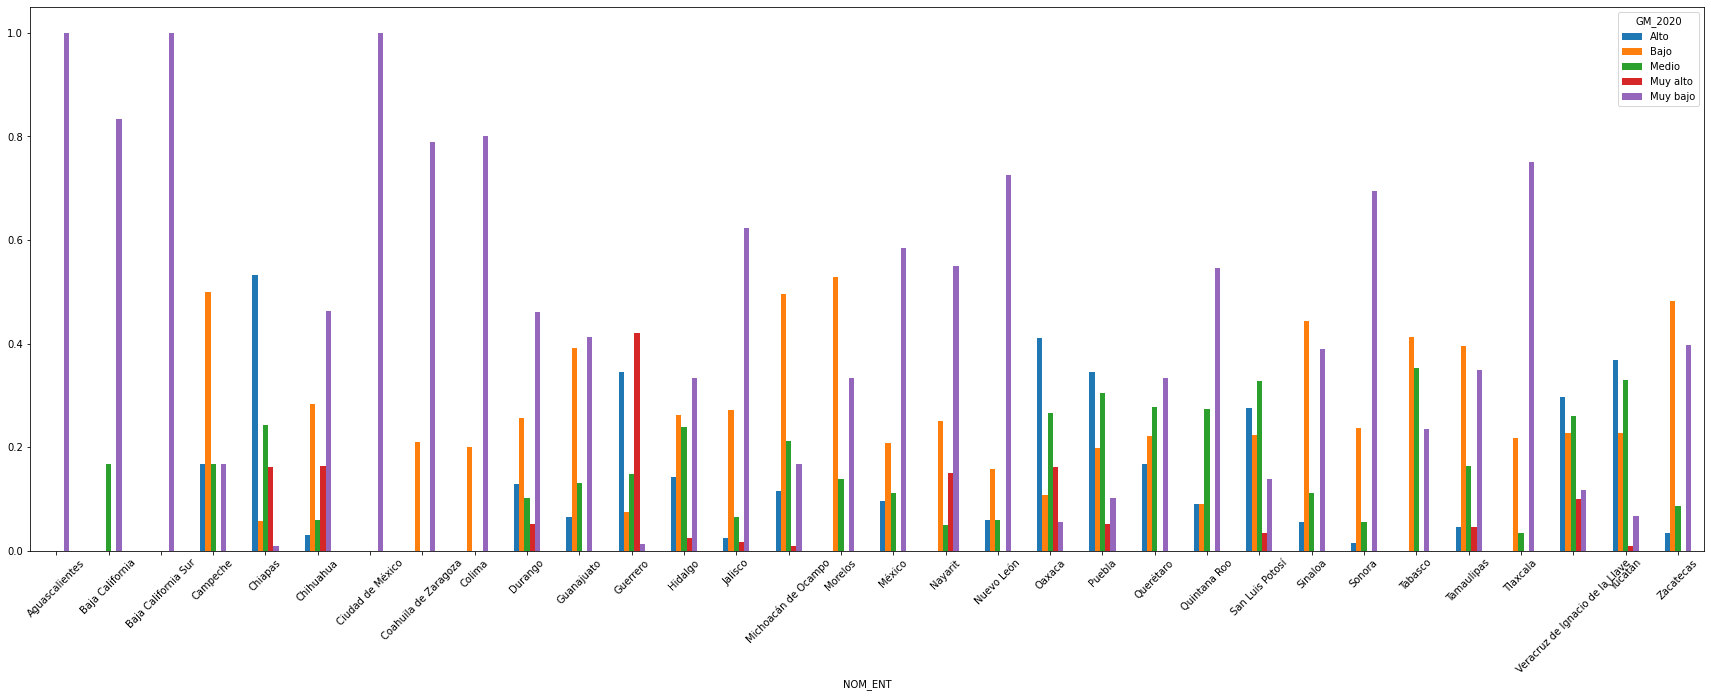

In [14]:
"""Sacamos que porcentaje de municipios en los diferentes 
categorias de marginación por estado."""
ind_mun_por_estado = (data_mncpio.groupby(["NOM_ENT", "GM_2020"])
                      ["NOM_MUN"].count())
ind_mun_por_estado = ind_mun_por_estado/mun_po_estado
ind_mun_por_estado = ind_mun_por_estado.unstack()
ind_mun_por_estado.fillna(0).plot(kind="bar",figsize=(30,10), rot=45)

<AxesSubplot:xlabel='NOM_ENT'>

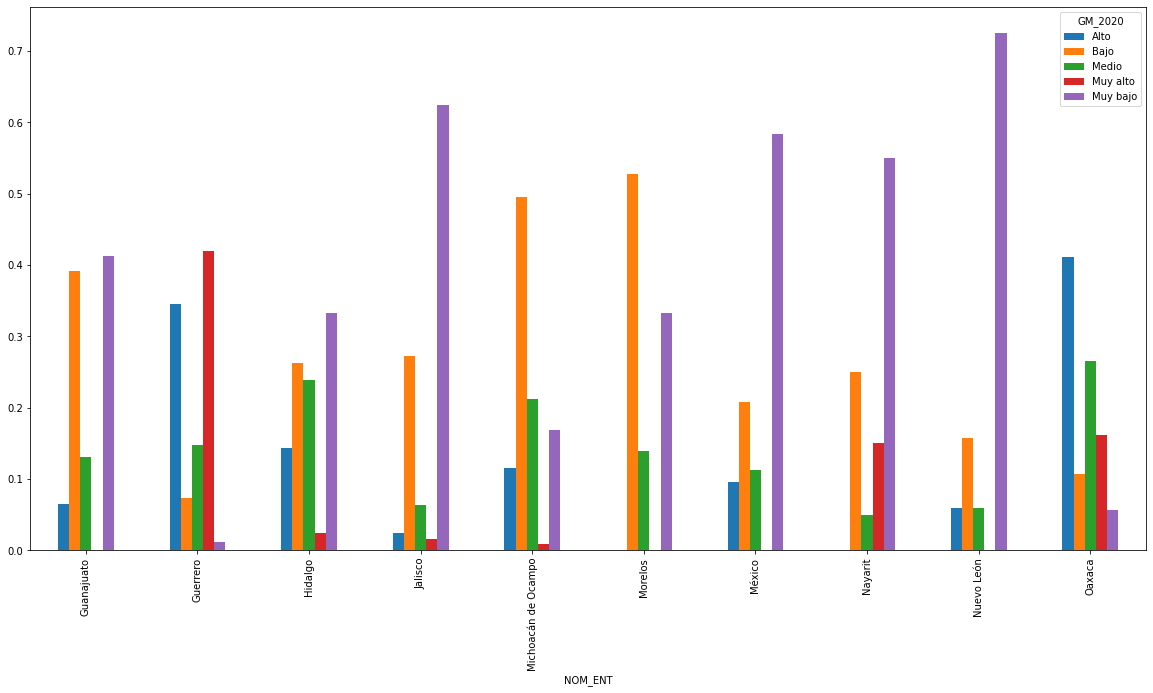

In [15]:
ind_mun_por_estado.fillna(0).iloc[10:20].plot(kind="bar",figsize=(20,10))

In [57]:
pop_estado = data_mncpio.groupby("NOM_ENT")["POB_TOT"].sum()
pop_estado["Sonora"]

2944840.0

<AxesSubplot:xlabel='NOM_ENT'>

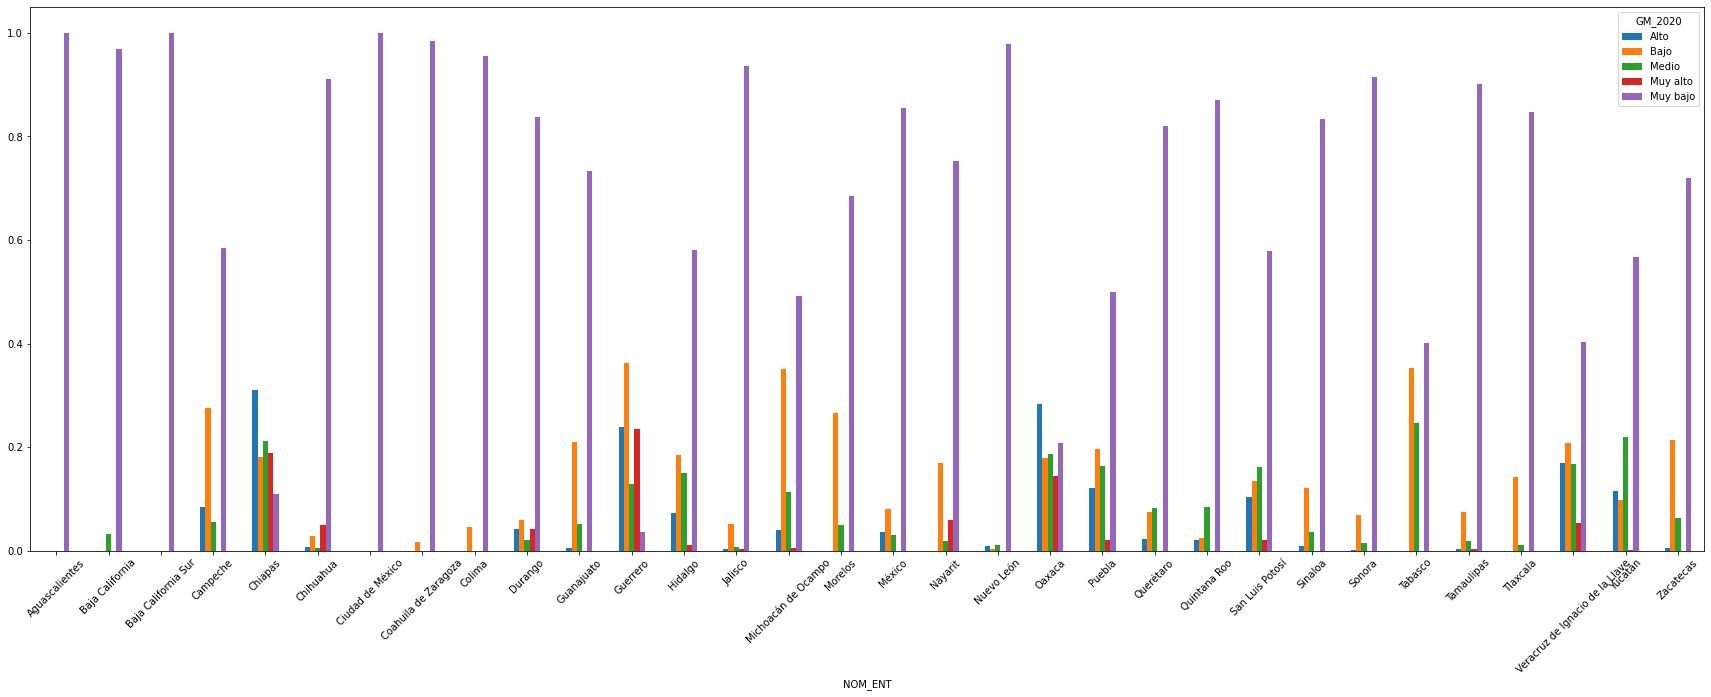

In [65]:
"""Caluclamos que porcentaje de poblacion que se presenta 
en cada categoria de marginacion por estado"""
pop_muybajo_dt = (data_mncpio.groupby(["NOM_ENT", "GM_2020"])
                  ["POB_TOT"].sum()/pop_estado)
pop_muybajo_dt = pop_muybajo_dt.unstack()
pop_muybajo_dt.fillna(0).plot(kind="bar",
                              figsize=(30,10), rot=45)


Se ratifica aquellas entidades que solo presentan municipios con un grado de marginacion muy bajo, como por ejemplo, Ciudad de Mexico, Aguas Calientes y Baja California Sur. Se puede apreciar que la gran mayoria de la gente se considera con un porcentaje de marginacion muy bajo; esto se debe a que la gran mayora de la gente que vive en esos estados, viven en ciudades. Esto quiere decir, que las zonas marjinadas se encuetran lejos de las manchas urbanas dondo es mas dificil hacer llegar los servicios basicos. En base a estas mismos graficas se puede apreciar que las zonas mas pobres de Mexico son Oaxaca, Guerrero y Chiapas.

Text(0, 0.5, '% Población de 15 años o más analfabeta')

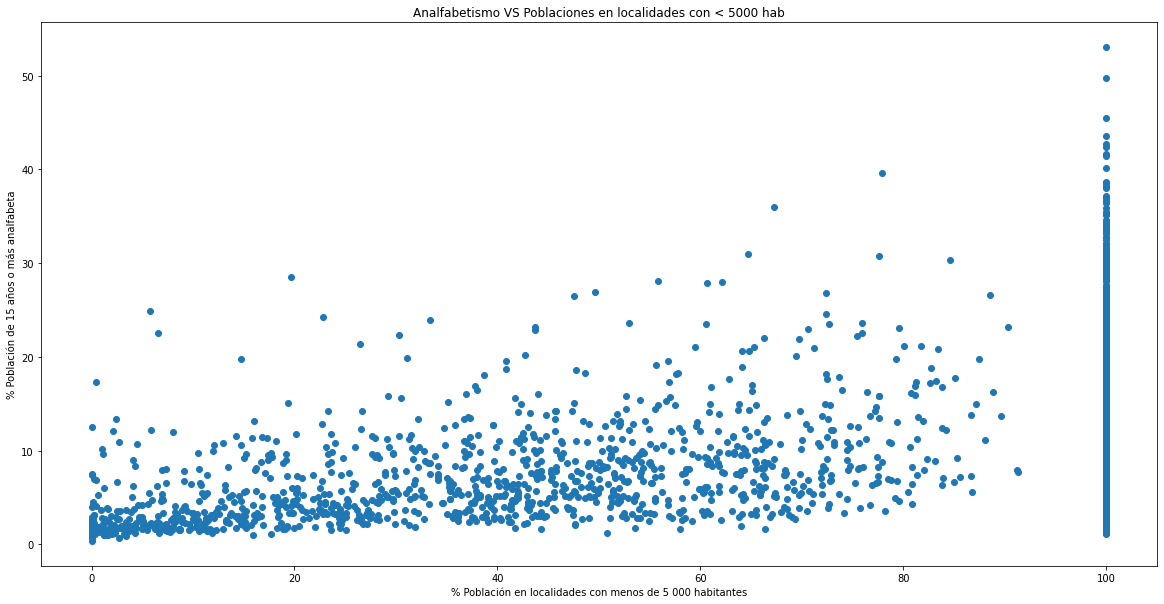

In [82]:
"""
Se grafica el Poblaciones en localidades con < 5000 hab vs 
Analfabetismo con la hipotesis nula de que estos estan 
correlacionados

"""
plt.figure(figsize=(20,10))
plt.scatter(x = data_mncpio["PL.5000"], y = data_mncpio["ANALF"])
plt.title("Analfabetismo VS Poblaciones en localidades con < 5000 hab")
plt.xlabel("% Población en localidades con menos de 5 000 habitantes")
plt.ylabel("% Población de 15 años o más analfabeta")


A simple vista no parece haber correlacion entre el porcentaje de poblacion que vive en localidades de menos de 5000 habitantes con el porcentaje de analfabetismo de 15 años o mas.

In [86]:
"""se muestra con que otra variable esta mas correlacionada el 
analfabetismo en poblacion de 15 años o mas"""

analfavetismo = data_mncpio.select_dtypes(include=['float64', 'int'])
analfavetismo.corr()

,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM
CVE_MUN,1.000000,-0.132783,0.013398,0.031973,-0.006849,-0.069015,0.009414,-0.073416,0.039625,0.069297,0.183936
POB_TOT,-0.132783,1.000000,-0.236801,-0.387466,-0.111017,-0.105180,-0.092102,-0.161628,-0.206148,-0.422541,-0.410937
ANALF,0.013398,-0.236801,1.000000,0.779053,0.347537,0.351523,0.360644,0.644960,0.658532,0.449324,0.620011
SBASC,0.031973,-0.387466,0.779053,1.000000,0.259337,0.296920,0.269822,0.548058,0.521014,0.598548,0.702248
OVSDE,-0.006849,-0.111017,0.347537,0.259337,1.000000,0.529746,0.219278,0.279222,0.374002,0.205200,0.204174
OVSEE,-0.069015,-0.105180,0.351523,0.296920,0.529746,1.000000,0.343723,0.501319,0.308139,0.231066,0.197733
OVSAE,0.009414,-0.092102,0.360644,0.269822,0.219278,0.343723,1.000000,0.391056,0.319650,0.189617,0.276074
OVPT,-0.073416,-0.161628,0.644960,0.548058,0.279222,0.501319,0.391056,1.000000,0.615184,0.338568,0.477667
VHAC,0.039625,-0.206148,0.658532,0.521014,0.374002,0.308139,0.319650,0.615184,1.000000,0.269036,0.580601
PL.5000,0.069297,-0.422541,0.449324,0.598548,0.205200,0.231066,0.189617,0.338568,0.269036,1.000000,0.575018


Se puede apreciar en la tabla pasada que el Analfabetismo tiene correlacion con el porcentaje de poblacion de 15 años o mas sin educacion basica. Esto es esperable, ya que en la educación basica es donde se aprende a leer y escribir.

Text(0, 0.5, '% Población de 15 años o más analfabeta')

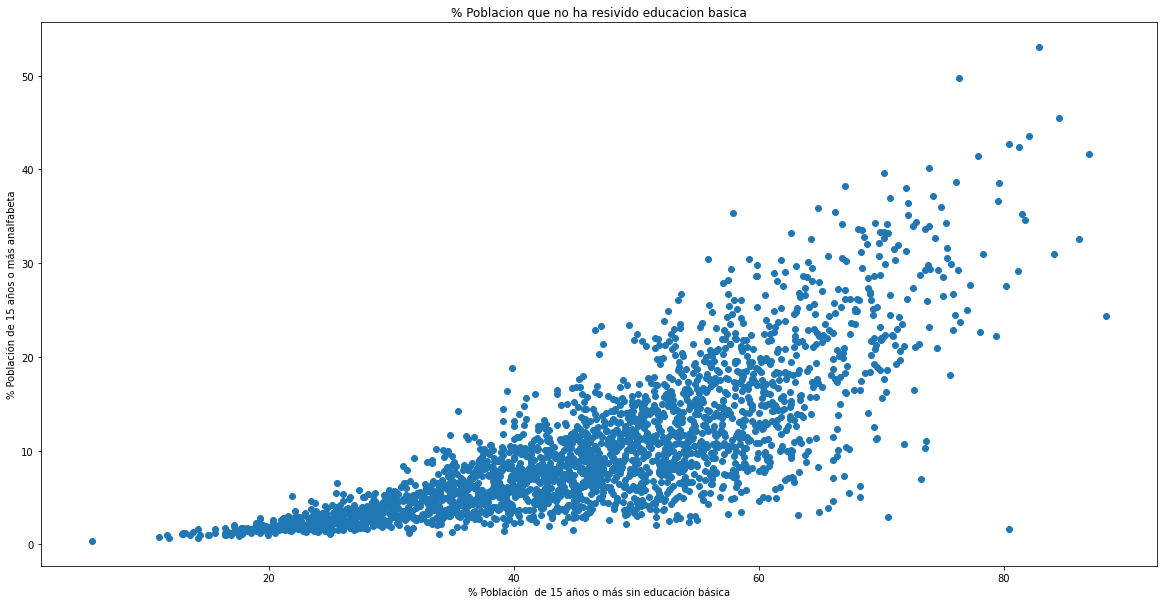

In [91]:
plt.figure(figsize=(20,10))
plt.scatter(x = data_mncpio["SBASC"], y = data_mncpio["ANALF"])
plt.title("% Poblacion que no ha resivido educacion basica")
plt.xlabel("% Población  de 15 años o más sin educación básica")
plt.ylabel("% Población de 15 años o más analfabeta")

En esta grafica se puede ver que mas que una correlacion lineal, tiene una correlación mas exponecial.

Se tiene la hipotesis nula de que los municipios con mas incidencia delictiva tienden a ser los mas marginados. Para esto, se utilizan los datos de incidencia delictiva, basados en una nueva metodologia, dispuesto por segob en https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva.
<center>

$\Large H_{0} : p = 0$ (No existe correlacion lienal)



$\Large H_{0} : p \ne 0$ (Existe correlacion lineal)

</center>

Para esto vamos a utilizar esto utilizaremos el Estadistico de prueba R.

In [147]:
#Abrimos el arcivo
inci_delictiva = pd.read_csv(r"C:\Users\Ivan\OneDrive - electro controles del noroeste\Reportes\IDM_NM_abr23.csv",
                             encoding = "ISO-8859-1")
inci_delictiva.head(3)

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0


In [148]:
#vemos las varianles que estan en su interior
inci_delictiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075738 entries, 0 to 2075737
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Año                     int64  
 1   Clave_Ent               int64  
 2   Entidad                 object 
 3   Cve. Municipio          int64  
 4   Municipio               object 
 5   Bien jurídico afectado  object 
 6   Tipo de delito          object 
 7   Subtipo de delito       object 
 8   Modalidad               object 
 9   Enero                   int64  
 10  Febrero                 int64  
 11  Marzo                   int64  
 12  Abril                   int64  
 13  Mayo                    float64
 14  Junio                   float64
 15  Julio                   float64
 16  Agosto                  float64
 17  Septiembre              float64
 18  Octubre                 float64
 19  Noviembre               float64
 20  Diciembre               float64
dtypes: float64(8), int64(7), object

In [149]:
#vemos un resumen de los datos numericos
inci_delictiva.describe()

,Año,Clave_Ent,Cve. Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
count,2.075738e+06,2.075738e+06,2.075738e+06,2.075738e+06,2.075738e+06,2.075738e+06,2.075738e+06,1.832404e+06,1.832404e+06,1.832404e+06,1.832404e+06,1.832404e+06,1.832404e+06,1.832404e+06,1.832404e+06
mean,2.019183e+03,1.920377e+01,1.930648e+04,6.633067e-01,6.628616e-01,7.435384e-01,6.888591e-01,7.226665e-01,7.167824e-01,7.071132e-01,7.276578e-01,7.102659e-01,7.448112e-01,6.962024e-01,6.719523e-01
std,2.518266e+00,7.540217e+00,7.556280e+03,7.932546e+00,7.838568e+00,8.735106e+00,8.219165e+00,8.621724e+00,8.480200e+00,8.420395e+00,8.685391e+00,8.303732e+00,8.625526e+00,8.137652e+00,8.083866e+00
min,2.015000e+03,1.000000e+00,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.017000e+03,1.400000e+01,1.405200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,2.000000e+01,2.021400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.021000e+03,2.500000e+01,2.500200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.023000e+03,3.200000e+01,3.205800e+04,1.760000e+03,1.479000e+03,1.712000e+03,1.791000e+03,1.727000e+03,1.897000e+03,1.612000e+03,2.143000e+03,2.076000e+03,1.452000e+03,1.915000e+03,1.909000e+03


In [150]:
#y un resumen de los datos categoricos
inci_delictiva.describe(include=object)

,Entidad,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad
count,2075738,2075738,2075738,2075738,2075738,2075738
unique,32,2334,7,40,55,59
top,Oaxaca,Benito Juárez,El patrimonio,Robo,Robo de maquinaria,Con violencia
freq,398762,6174,889602,762516,127086,254172


In [151]:
#se elista los diferentes delitos que existen.
set(inci_delictiva["Tipo de delito"])

{'Aborto',
 'Abuso de confianza',
 'Abuso sexual',
 'Acoso sexual',
 'Allanamiento de morada',
 'Amenazas',
 'Contra el medio ambiente',
 'Corrupción de menores',
 'Daño a la propiedad',
 'Delitos cometidos por servidores públicos',
 'Despojo',
 'Electorales',
 'Evasión de presos',
 'Extorsión',
 'Falsedad',
 'Falsificación',
 'Feminicidio',
 'Fraude',
 'Homicidio',
 'Hostigamiento sexual',
 'Incesto',
 'Incumplimiento de obligaciones de asistencia familiar',
 'Lesiones',
 'Narcomenudeo',
 'Otros delitos contra el patrimonio',
 'Otros delitos contra la familia',
 'Otros delitos contra la sociedad',
 'Otros delitos del Fuero Común',
 'Otros delitos que atentan contra la libertad personal',
 'Otros delitos que atentan contra la libertad y la seguridad sexual',
 'Otros delitos que atentan contra la vida y la integridad corporal',
 'Rapto',
 'Robo',
 'Secuestro',
 'Trata de personas',
 'Tráfico de menores',
 'Violación equiparada',
 'Violación simple',
 'Violencia de género en todas sus mo

Se puede apreciar esta base de datos se compone mayormente de todas las incidencias delictivas estan organizadas por mes y por subtipo de delito. Combertimos los delitos al mes por delitos al año. Los tipos de delito vana desde Lesiones hasta Homicidio. En este caso estimaremos el numero de homicidios. 

In [153]:
hmcidios_2022 = inci_delictiva[(inci_delictiva["Año"] == 2022) 
                                     & (inci_delictiva["Tipo de delito"] 
                                        == "Homicidio")]

#sumamos todos los homicidios
hmcidios_2022["hmcdios_año"] = [sum(x) for x in hmcidios_2022
                                       .loc[:,"Enero":"Diciembre"].values]

# Nos desacemos de las columnas de meses para solo quedarnos con homicidios por año
hmcidios_2022 = hmcidios_2022.drop(columns=hmcidios_2022.columns[9:-1])




c:\Users\Ivan\.conda\envs\f80-2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,hmcdios_año
1589462,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,18.0
1589463,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,8.0
1589464,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,11.0
1589465,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,0.0
1589466,2022,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0.0
...,...,...,...,...,...,...,...,...,...,...
1832310,2022,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0.0
1832311,2022,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma blanca,0.0
1832312,2022,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,En accidente de tránsito,1.0
1832313,2022,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con otro elemento,0.0
